<h1>JCDL 2020 Workshop
   

1. To download bibliographic dataset we use Z39.50 protocol

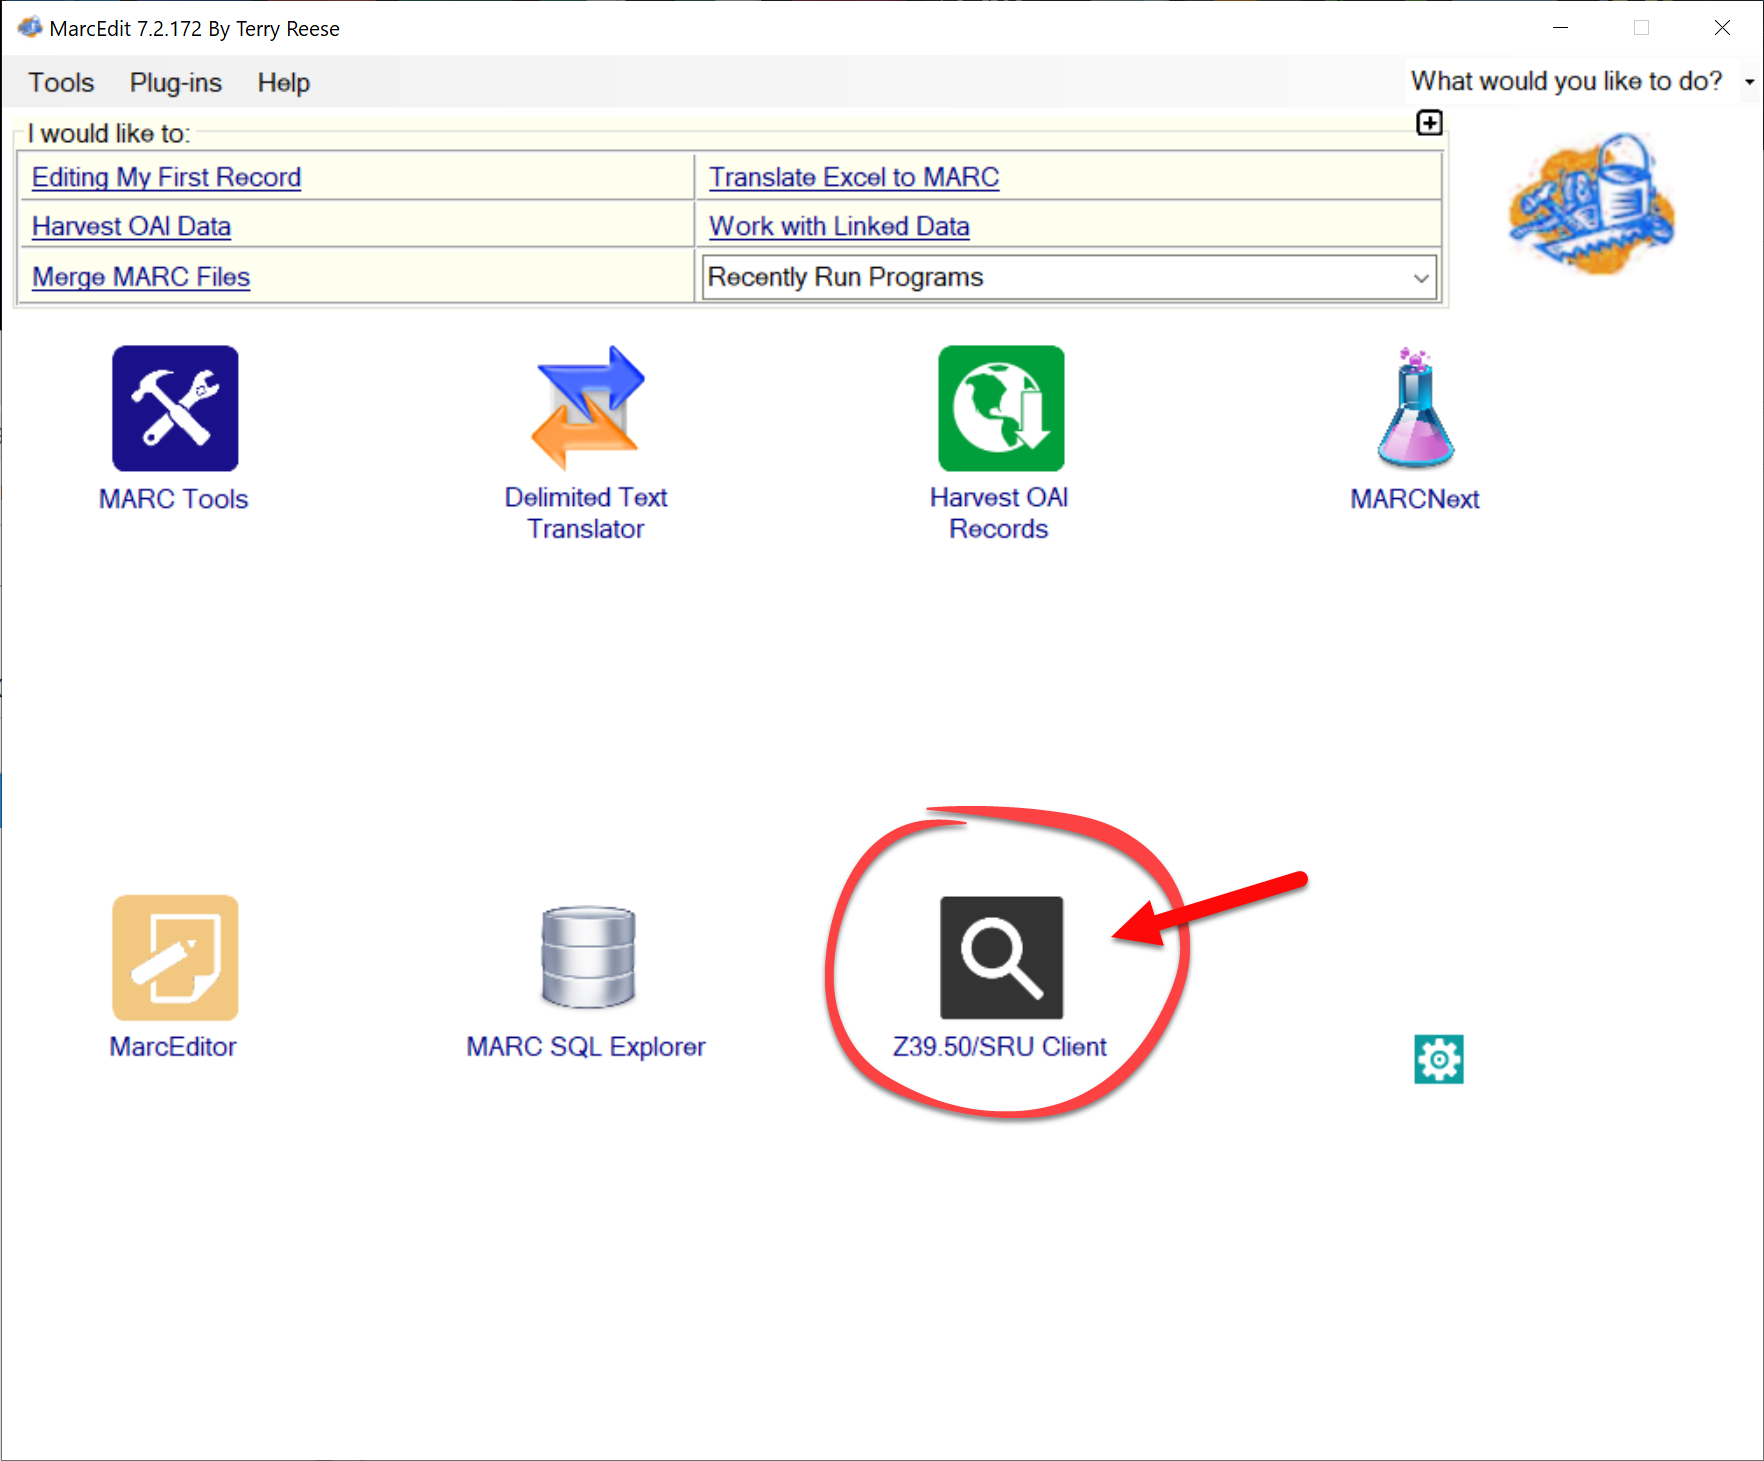

2. We initiate Z39.50 client integrated in MarcEdit and query database:

<b>RPN query:</b> 
`@and @attr 1=5067 rda @attr 1=5991 2020????`

<p>Date Created as MARC: 5991/word, phrase	008/00-05 "Entered".</p>
Note: Enter date in the format `yyyymmdd` (y=year, m=month, d=day).
<p>? -- wildcard

From the list of actions you can select/edit the settings of the database you want to work with;
<p>enter the query;
<p>select number of records per page (number of search results per action)

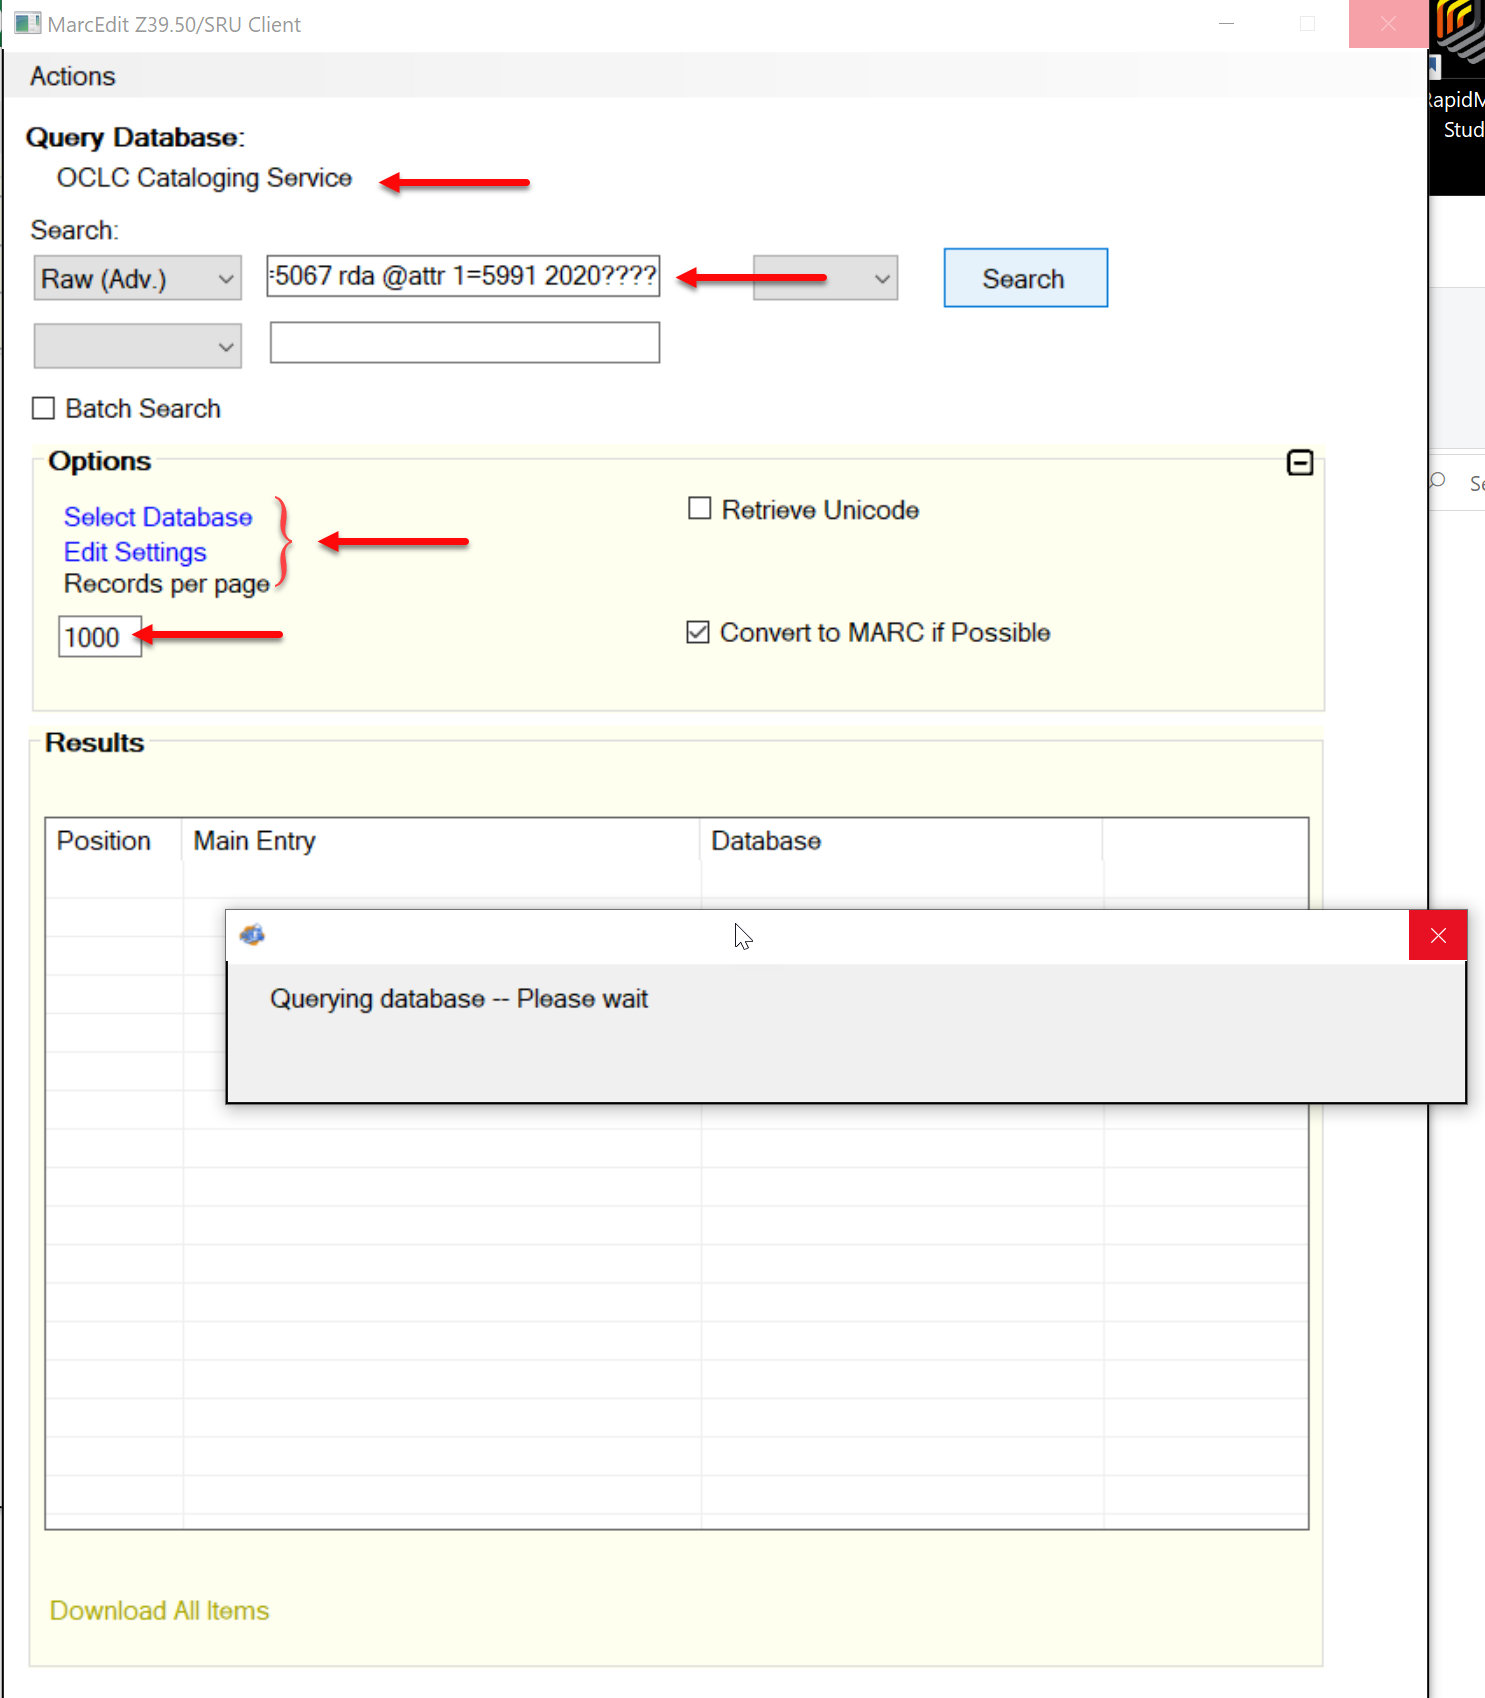

3. List of results looks like this:

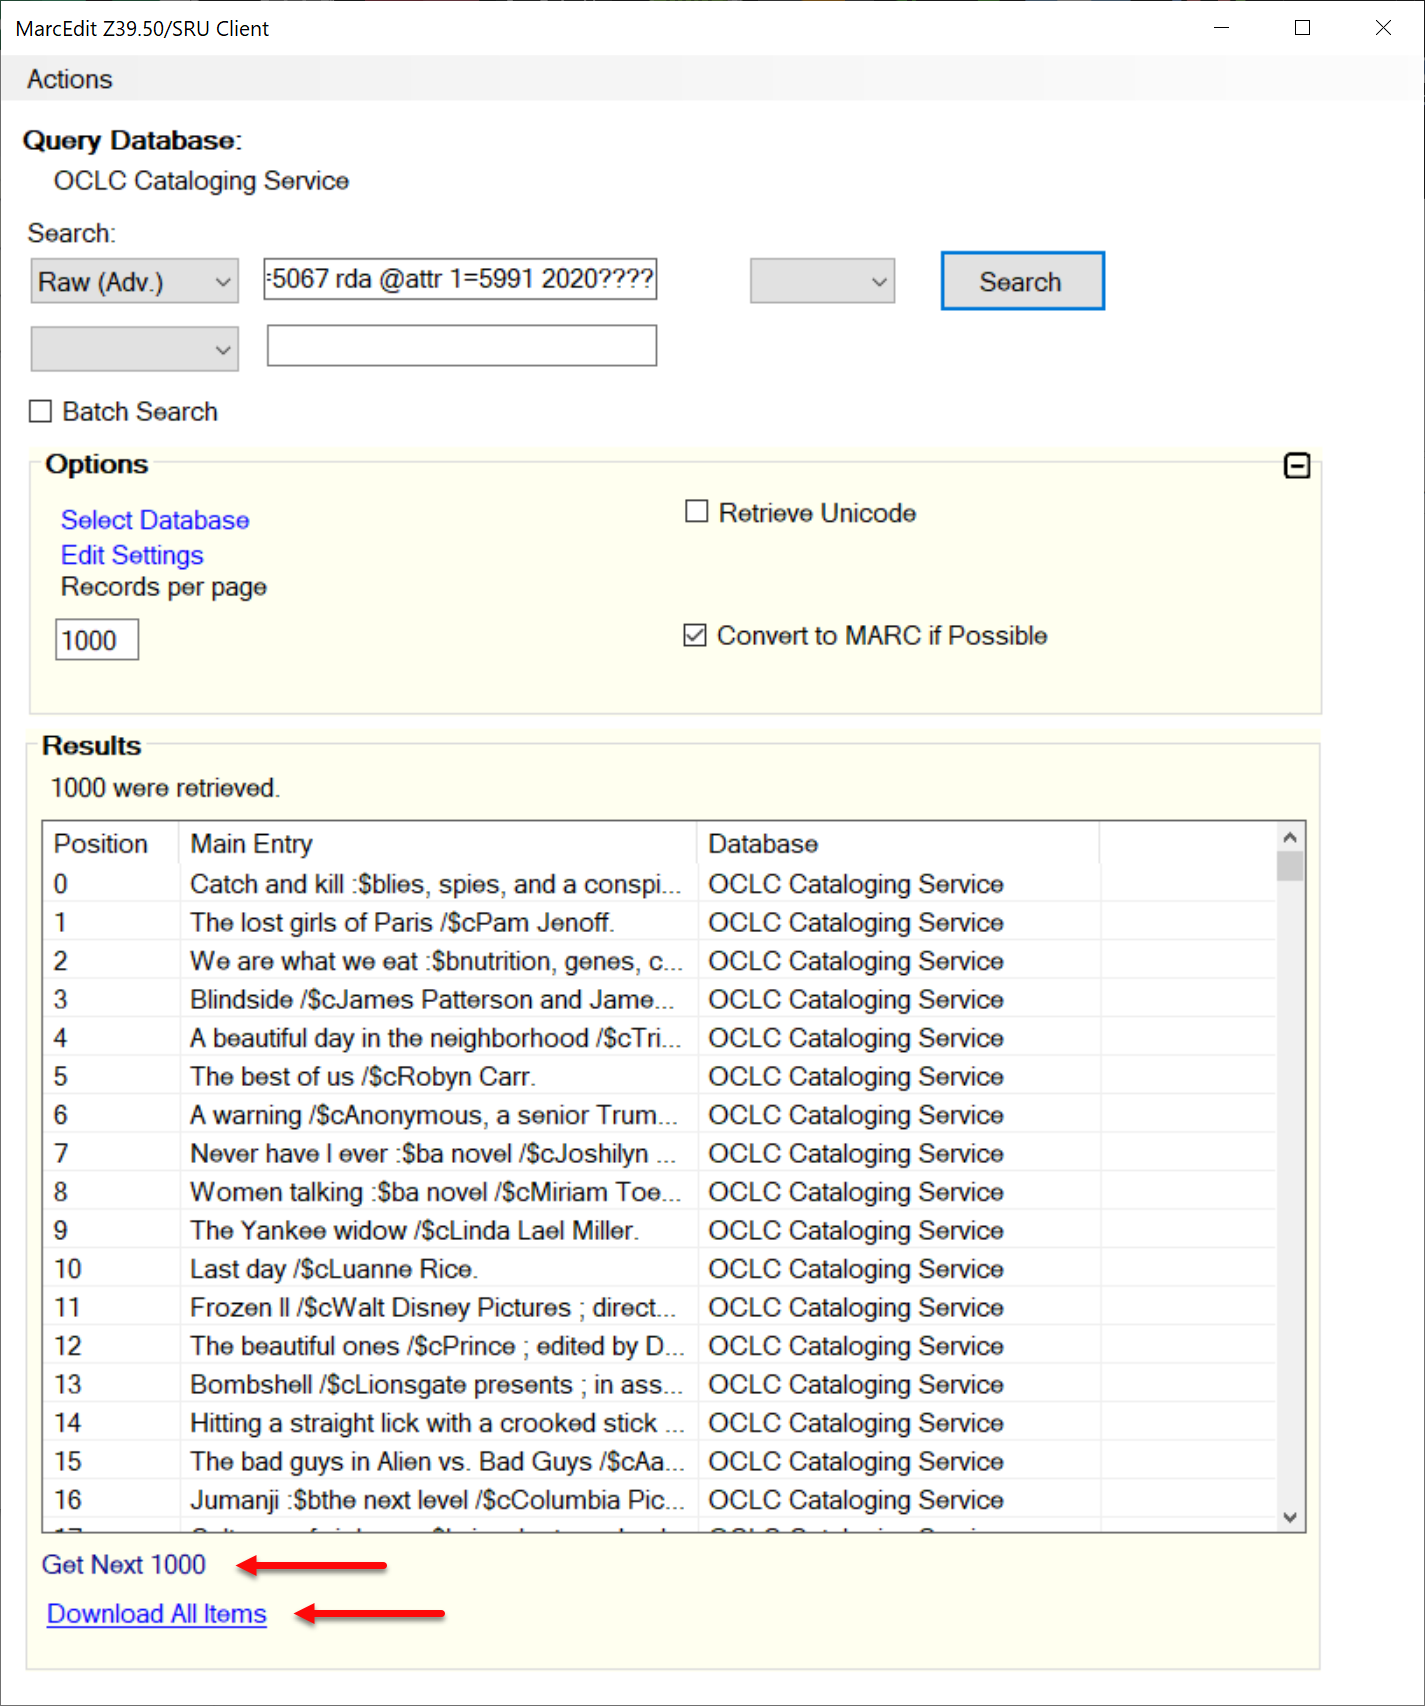

Downloaded dataset is in <b>.mrc</b> format

Deduplication process is needed:

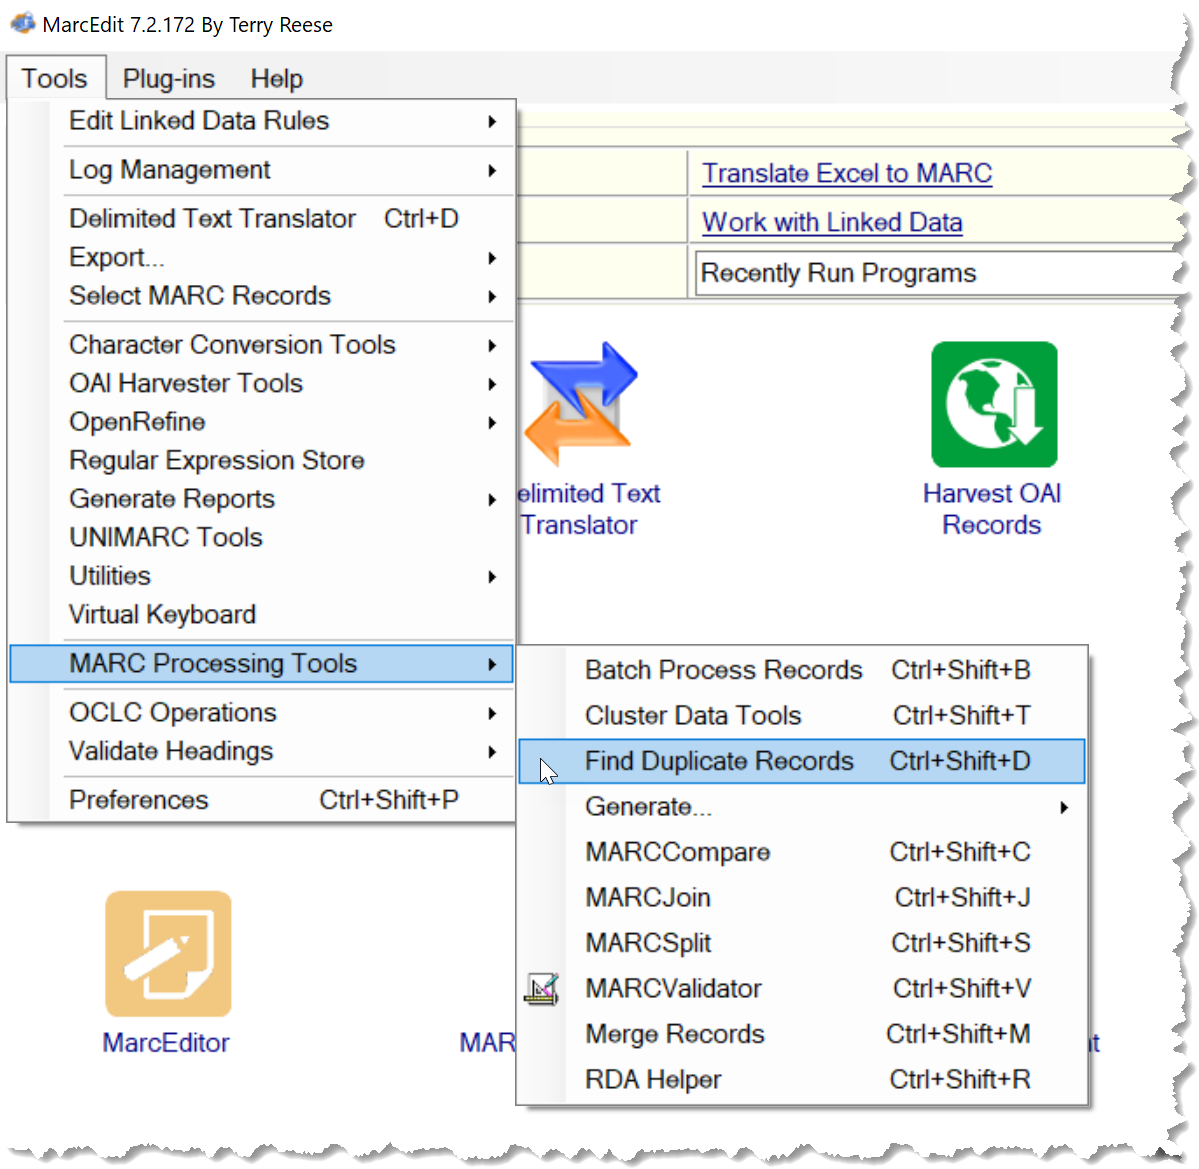

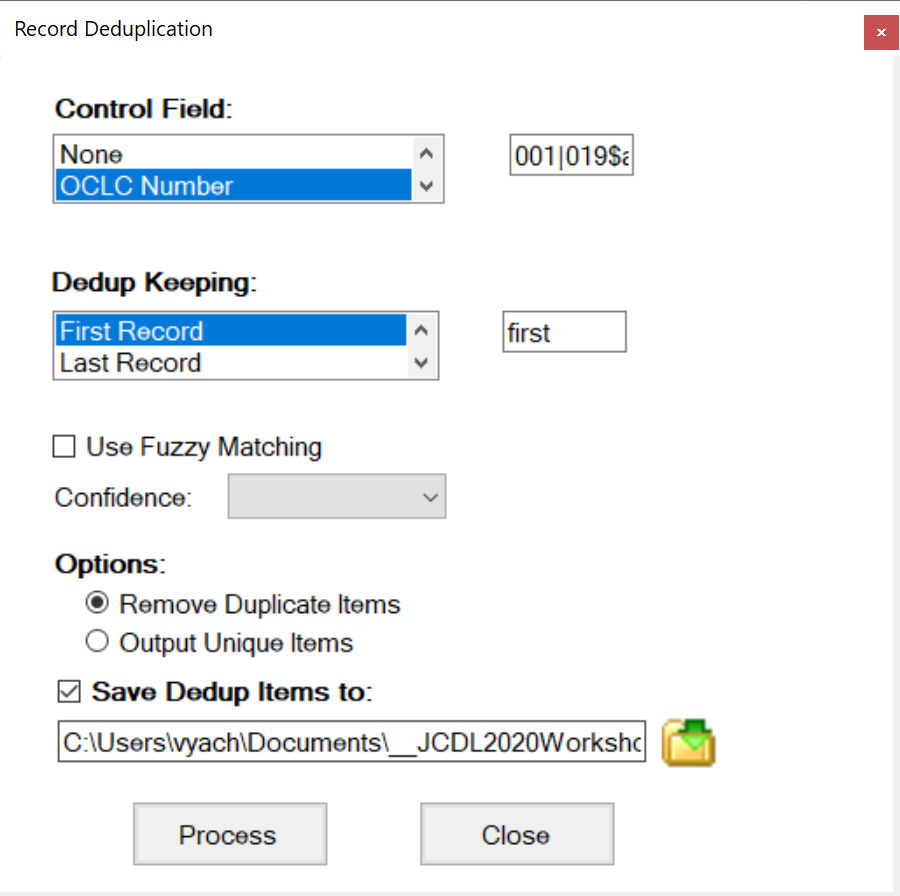

<b>21</b> records were deleted (1000 - 979)

<b>.mrc</b> to <b>.mrk</b>

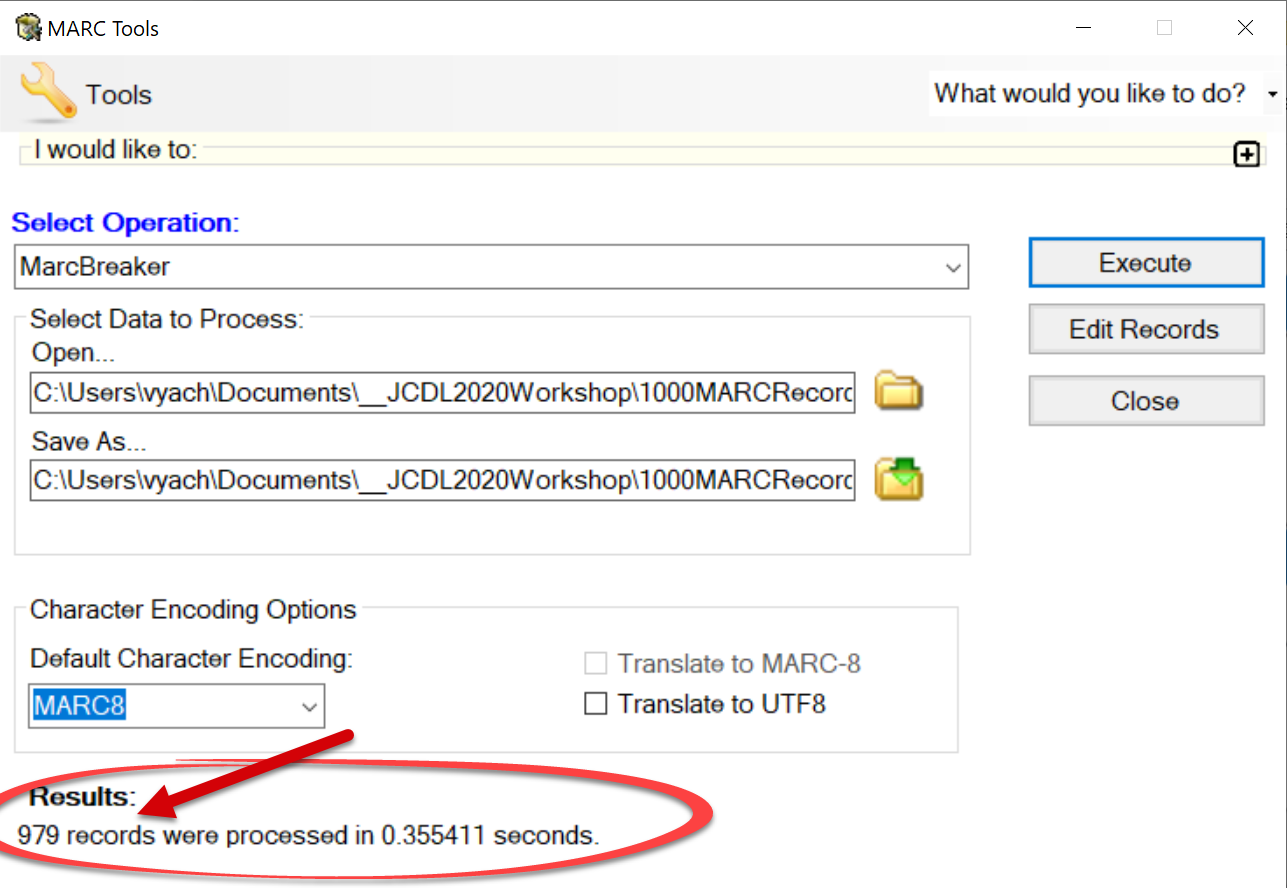

<b>.mrk</b> vs <b>.mrc</b>

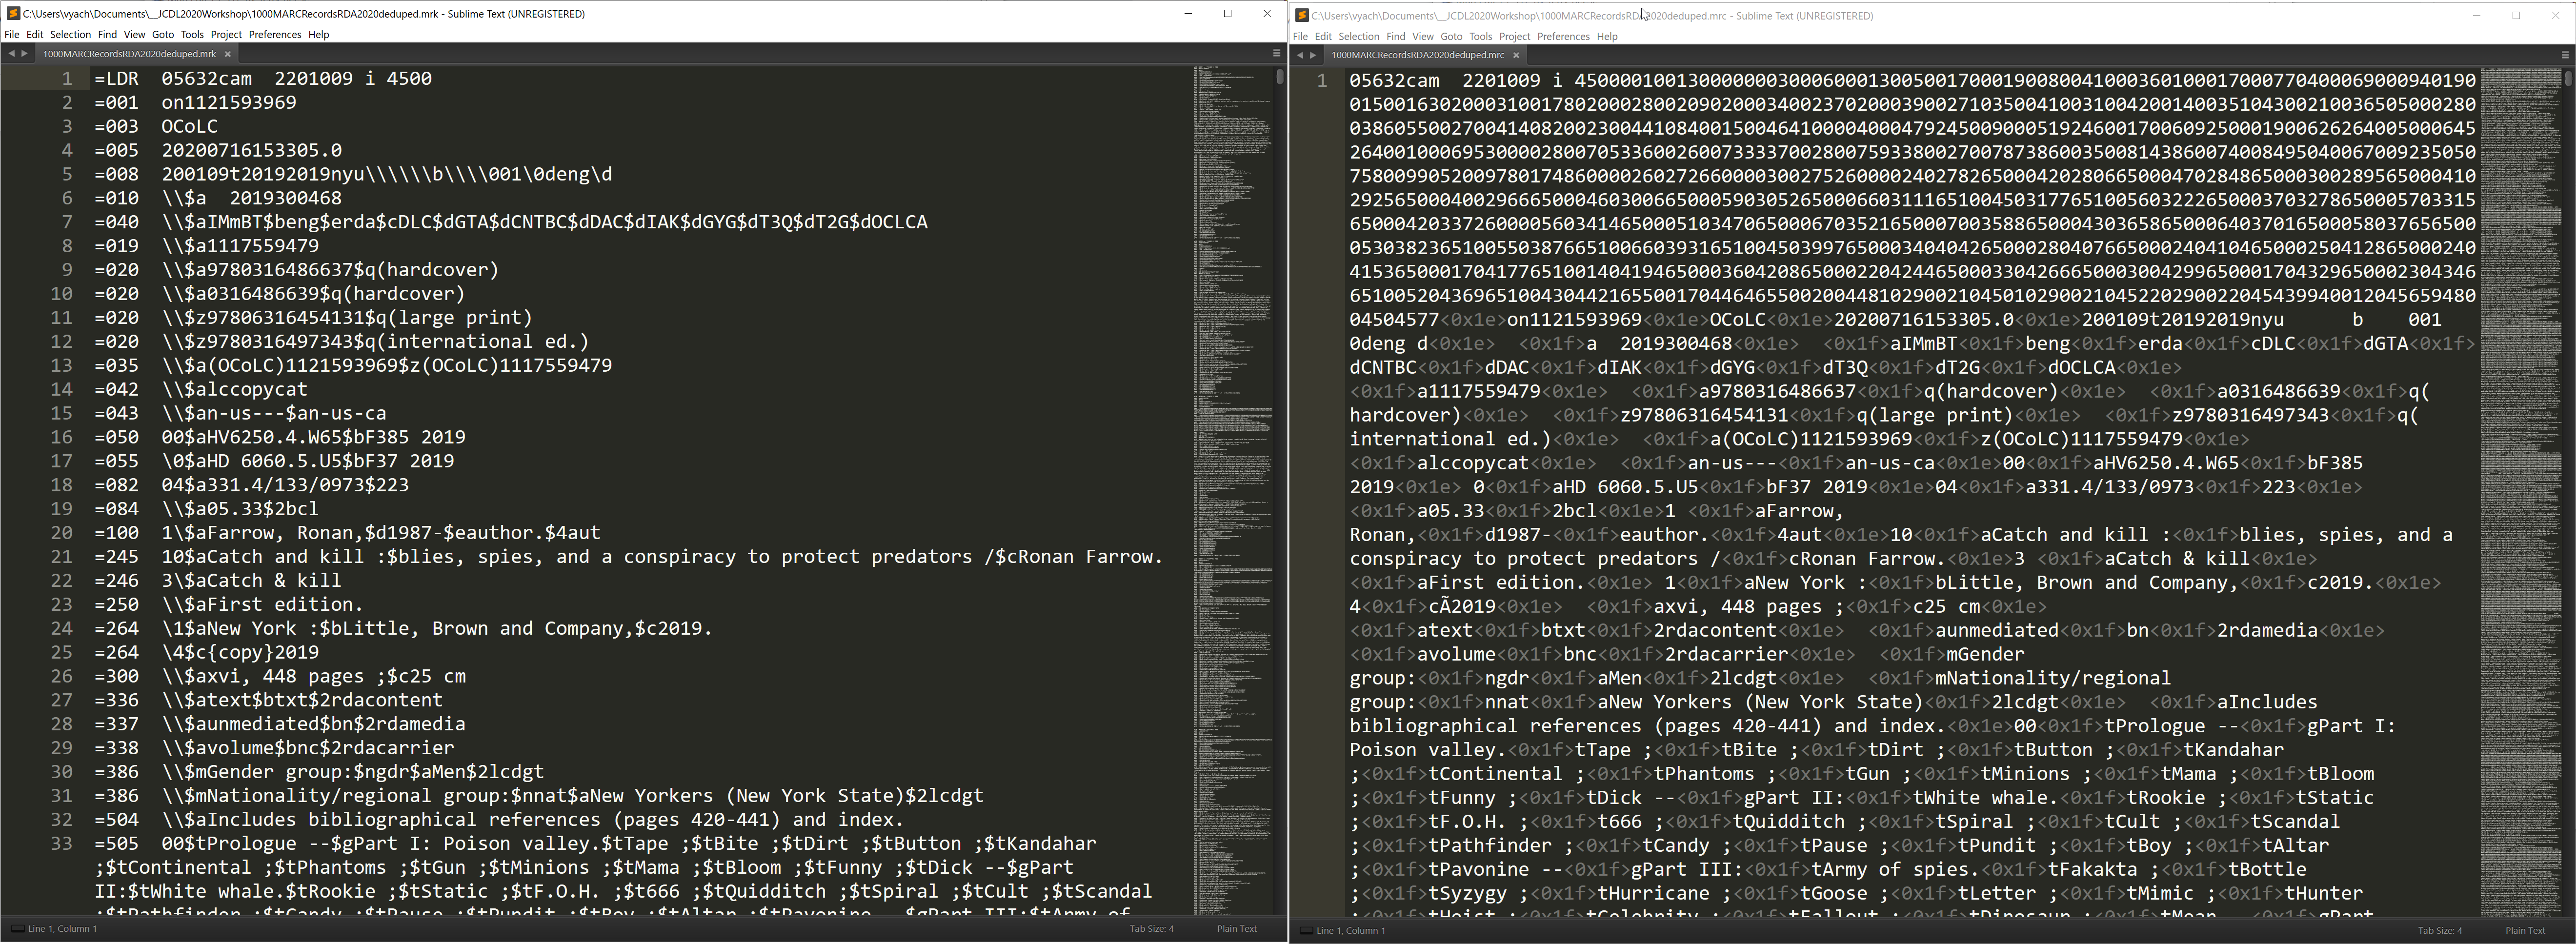

<h2>We can initiate different reports through MarcEdit

008 Languages of Materials

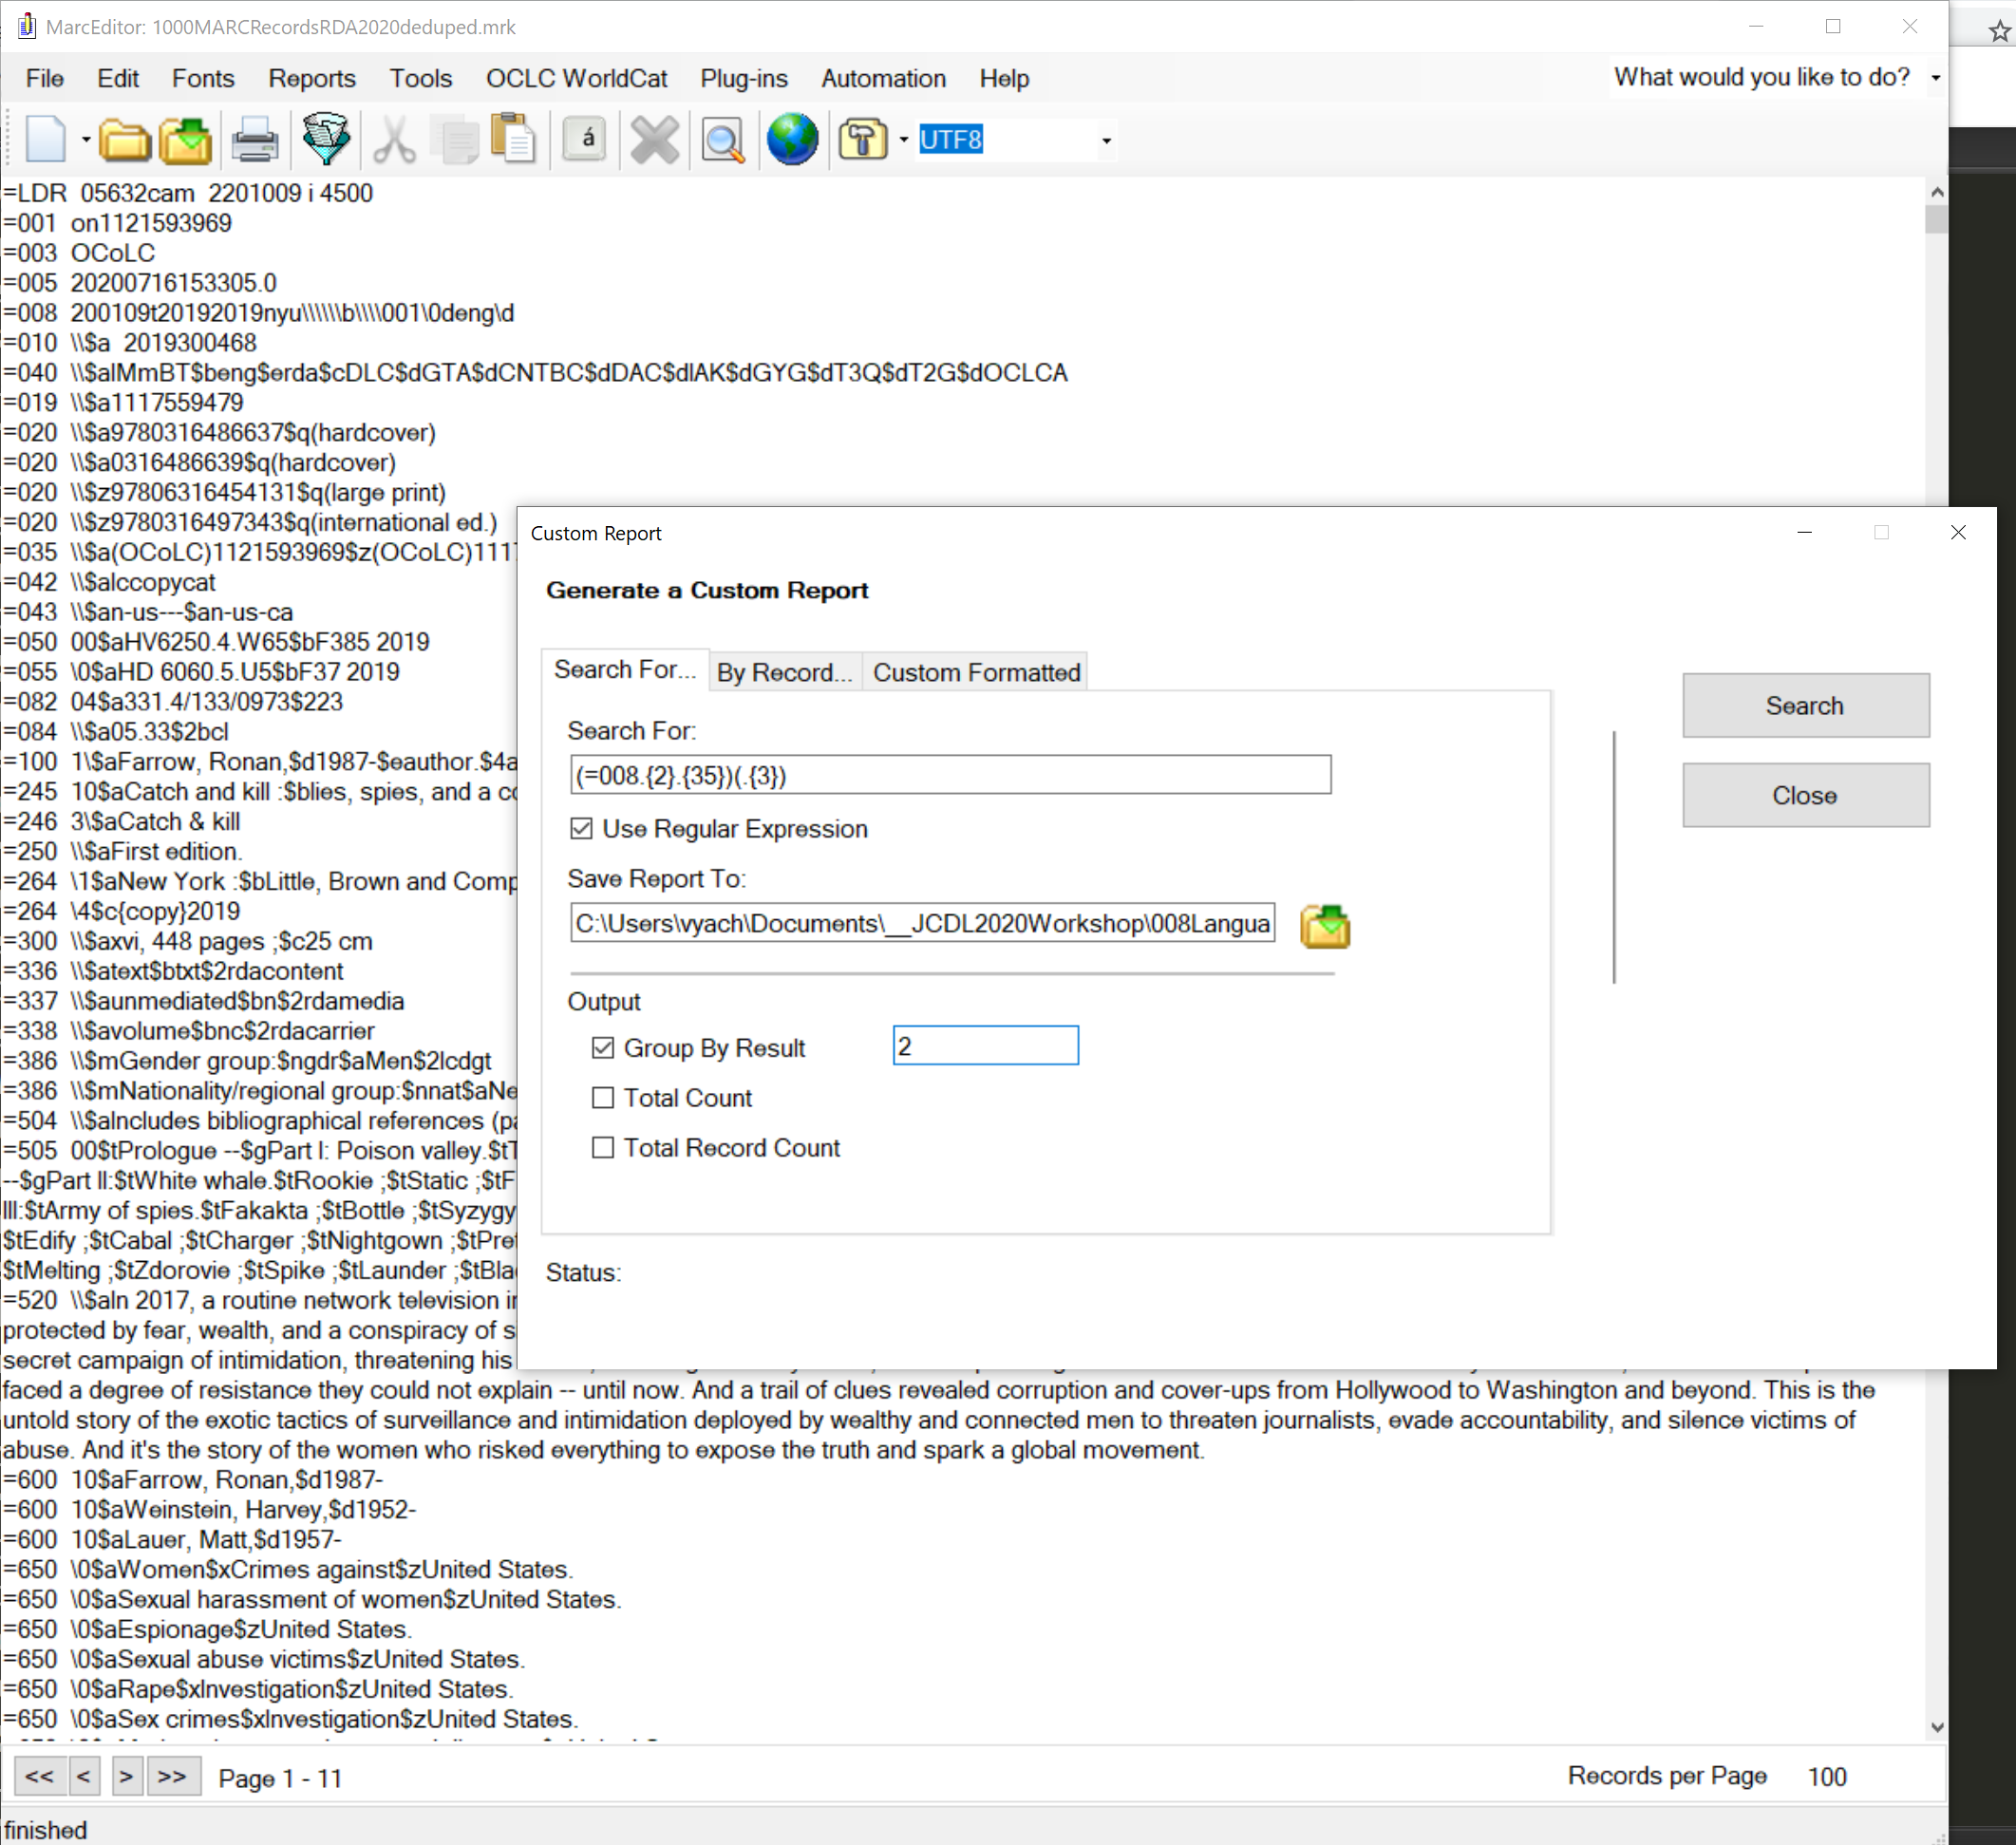

If we select <b>Total Count</b> and <b>Total Record Count</b>, we will have very neat report:

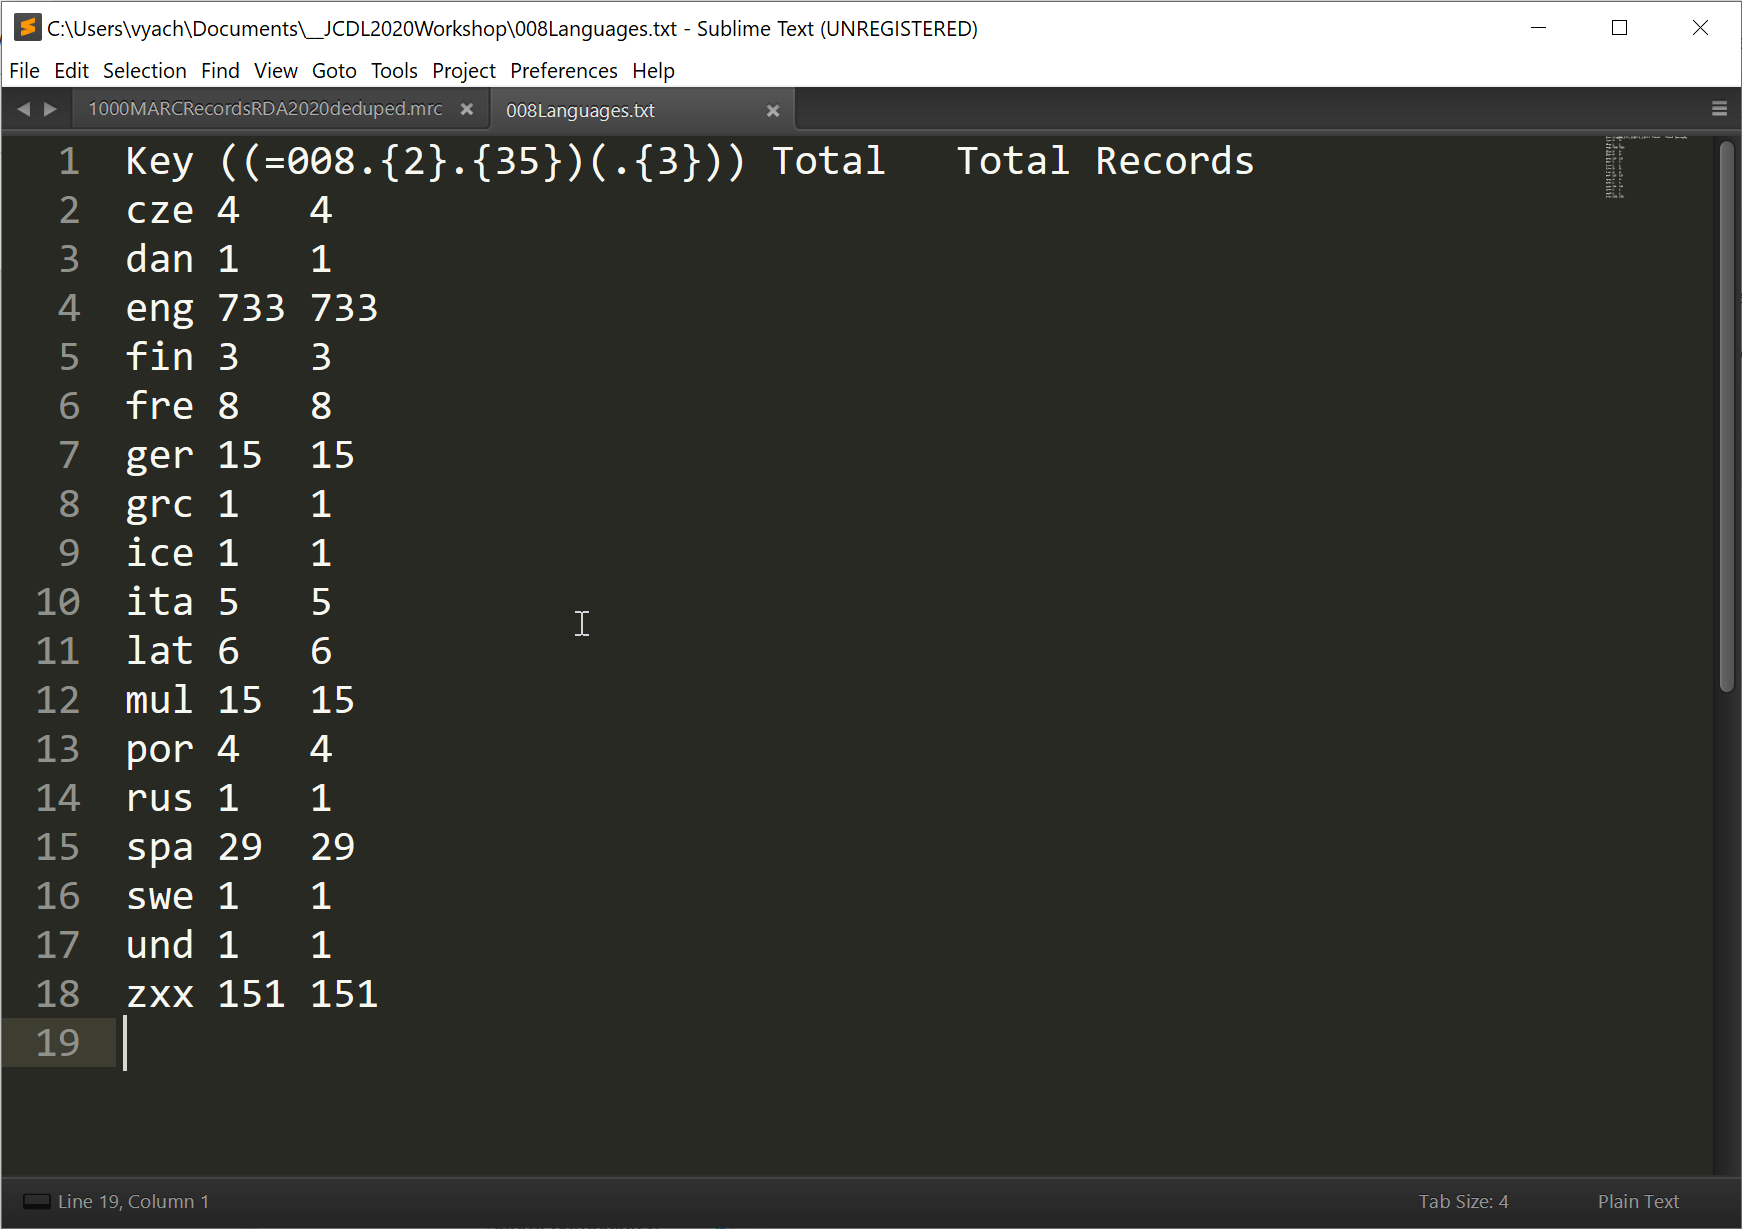

<h2>There is another way to work with .mrc directly and use PyMARC, a Python library developed for working with MARC21 

If you don't have pymarc installed: `pip install pymarc`

Let's collect data about 008 Language of material

In [1]:
from pymarc import MARCReader
import csv

#create a CSV file
#csv_out = csv.writer(open('001_008Lang.csv', 'w'), delimiter = ',', quotechar = '\"', quoting = csv.QUOTE_ALL)
csv_out = csv.writer(open('001_008Lang.csv', 'w'), delimiter = ',', quoting = csv.QUOTE_NONE)

#write a header row in your CSV file
csv_out.writerow(['001','008 LANG'])

with open('1000MARCRecordsRDA2020deduped.mrc', 'rb') as fh:
    reader = MARCReader(fh)
    for record in reader:
        recnumber = lang = ''
        
        if record['001'] is not None:
            recnumber = record['001']
        
    #get bytes 35-37 of the 008 field Language code element:  
        if record['008'] is not None:
          #convert the field to a string
            lang = str(record['008'])
          #skip 6 characters =008  (including two speces after 8)
          #grab 3 character code - start from 41 and stop on 44
            lang = lang[41:44]
        
        csv_out.writerow([recnumber,lang])

Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in g0=66 g1=69
Unable to parse character 0x80 in 

In [2]:
import pandas as pd
data = pd.read_csv("001_008Lang.csv",dtype = str)

In [3]:
data

001 008 LANG
0    =001  on1121593969      eng
1    =001  on1078536709      eng
2    =001  ocn631692768      eng
3    =001  on1138991029      eng
4    =001  on1135064888      eng
..                  ...      ...
678  =001  on1135462582      eng
679  =001  on1137243023      eng
680  =001  on1135867487      eng
681  =001  on1136155548      eng
682  =001  on1140071505      eng

[683 rows x 2 columns]

In [4]:
data['008 LANG'].value_counts()

eng    647
spa     28
por      4
ger      2
zxx      1
fre      1
Name: 008 LANG, dtype: int64

In [5]:
# split =001 column

new = data["001"].str.split(" ", n = 1, expand = True) 
data["Field Name"]= new[0]
data["Data Values"]= new[1]
data.drop(columns =["001"], inplace = True)

In [6]:
# removing 1-st character in Field Name
data['Field Name'] = data['Field Name'].str[1:]
data

008 LANG Field Name    Data Values
0        eng        001   on1121593969
1        eng        001   on1078536709
2        eng        001   ocn631692768
3        eng        001   on1138991029
4        eng        001   on1135064888
..       ...        ...            ...
678      eng        001   on1135462582
679      eng        001   on1137243023
680      eng        001   on1135867487
681      eng        001   on1136155548
682      eng        001   on1140071505

[683 rows x 3 columns]

In [7]:
data.columns

Index(['008 LANG', 'Field Name', 'Data Values'], dtype='object')

In [8]:
# delete one column
data.drop(columns =['Field Name'], inplace = True) 

In [9]:
# rename columns by using the 'rename' method
data.rename(columns={'Data Values':'001'}, inplace=True)
data

008 LANG            001
0        eng   on1121593969
1        eng   on1078536709
2        eng   ocn631692768
3        eng   on1138991029
4        eng   on1135064888
..       ...            ...
678      eng   on1135462582
679      eng   on1137243023
680      eng   on1135867487
681      eng   on1136155548
682      eng   on1140071505

[683 rows x 2 columns]

In [10]:
# change order of columns in data frame:
data = data[['001','008 LANG']]
data.head()

001 008 LANG
0   on1121593969      eng
1   on1078536709      eng
2   ocn631692768      eng
3   on1138991029      eng
4   on1135064888      eng

In [11]:
data.to_csv('001_008Lang_clean.csv')